## Import libraries

In [28]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import the ML libs
import sklearn
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')


print("scikit-learn version:", sklearn.__version__)    
print("pandas version:", pd.__version__)            
print("seaborn version:", sns.__version__)  
print("matplotlib version:", matplotlib.__version__) 

scikit-learn version: 1.3.0
pandas version: 1.5.3
seaborn version: 0.12.2
matplotlib version: 3.7.1


## Load the data

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

print(df.shape)

(962, 2)


### 📃 Sample the data

Below I am viewing dataset to have an impression of the data. For that I am printing 15 random rows.

In [3]:
df.sample(15)

,Category,Resume
944,Testing,â Willingness to accept the challenges. â ...
149,Web Designing,"IT SKILLS Languages: C (Basic), JAVA (Basic) W..."
69,HR,KEY SKILLS: â¢ Computerized accounting with t...
227,Sales,KEY SKILLS: â¢ Planning & Strategizing â¢ Pr...
515,Operations Manager,Education Details \r\n BCA Vinayaka Missions...
460,Automation Testing,Education Details \r\n B.Tech Electronics And ...
64,HR,Education Details \r\n BA mumbai University\...
673,Network Security Engineer,"Operating Systems: Windows, Linux, Ubuntu Netw..."
354,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja..."
471,Automation Testing,"SKILLS Agile Methodology Scrum, Kanban, Extrem..."


I am going to look at the data globally by printing the `data info`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


## Data Preparation

In this section I will handle data with `NaN` values, check duplicates and drop them if required.

In [5]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

You can see in the above code cell that we don't have null values in our data

In [6]:
duplicatedsValues = df.duplicated()
print(duplicatedsValues.sum())
df[duplicatedsValues]

796


,Category,Resume
10,Data Science,Skills * Programming Languages: Python (pandas...
11,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
12,Data Science,"Areas of Interest Deep Learning, Control Syste..."
13,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
14,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


From the above result we have alot of duplicate values, we can remove them by using drop-duplicate so that my analysis can be .

In [7]:
df.drop_duplicates(inplace=True)

I am verifying if duplicates rows are removed.

In [8]:
duplicatedsValues = df.duplicated()
duplicatedsValues.sum()

0

I want to check the number of categories i have. For each cagetorie.

<Axes: xlabel='count', ylabel='Category'>

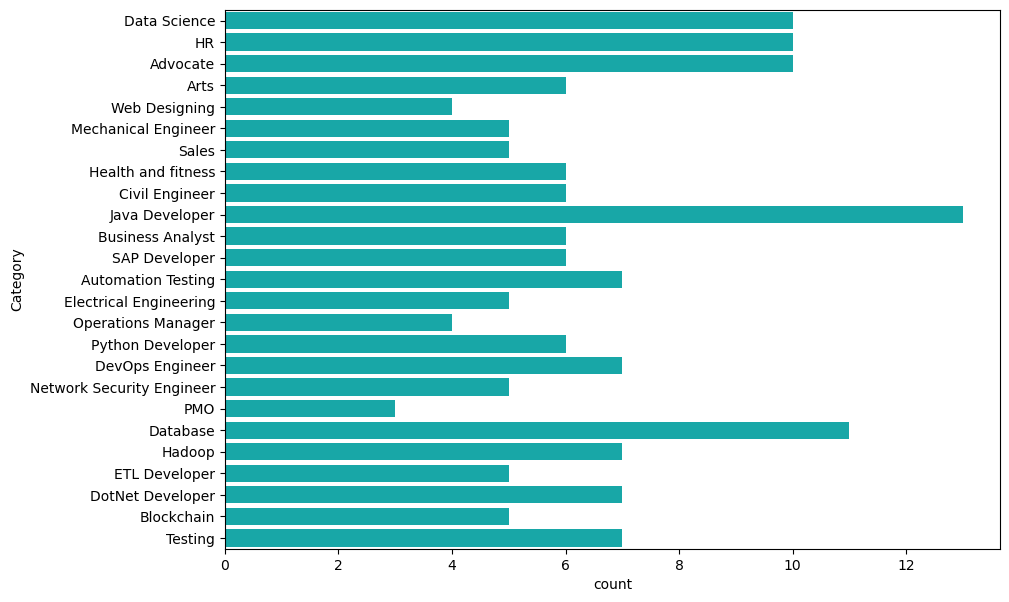

In [9]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(y="Category", data=df, color="c")

In [10]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [11]:
print(df['Category'].value_counts())

Java Developer               13
Database                     11
Data Science                 10
Advocate                     10
HR                           10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
Web Designing                 4
PMO                           3
Name: Category, dtype: int64


In [12]:
df=df.reset_index(drop=True)

## Prediction

## 🧬 Modelling

In this step I will use TFIDF word vectorizer to convert the `Resume` text data into numerical features.
The goal of using tf-idf is that it not only focuses on the frequency of words present in the corpus, but also provides the weight of the words. Sklearn.feature_extraction.text.TfidFVectorizer. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.t


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=.01, use_idf =True, stop_words = 'english')
tf_X_vectorized = tfidf_vectorizer.fit_transform(df['Resume']).toarray()
tf_X_vectorized.shape

(166, 3202)

To perform KMeans clustering, I will use [sklearn KMeans clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). 

First I will try to find an optimal K(number of clusters) value for our dataset using the Elbow method [k mean getting the optimal number of clusters.](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/)


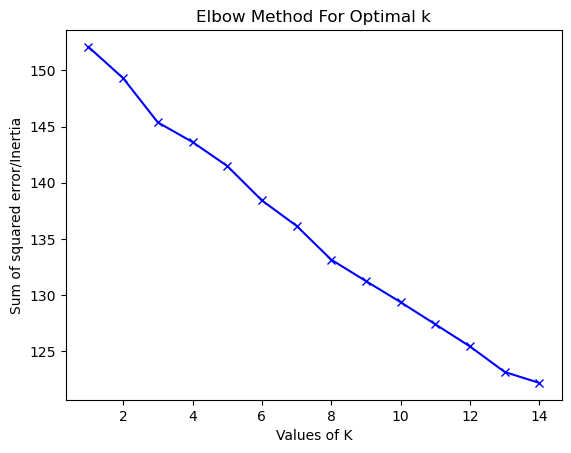

In [30]:
Sum_of_squared_error=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k, n_init='auto', random_state=10)
    kmeans.fit(tf_X_vectorized)
    Sum_of_squared_error.append(kmeans.inertia_)
plt.plot(range(1,15),Sum_of_squared_error,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared error/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

From the graph above, we can see that the points don't form an elbow, we can only see that at k=3, k=8 and k=13 the graph bends.
I will use the three points to see which k-mean will clear clusters.

Performing K-means clustering to group the resumes in 3, 8 and 13 clusters and observe which K value produce clear grouping. Since some categories are more or less the same, for example, Testing and Automation testing, I decide to group the resumes in 15 clusters

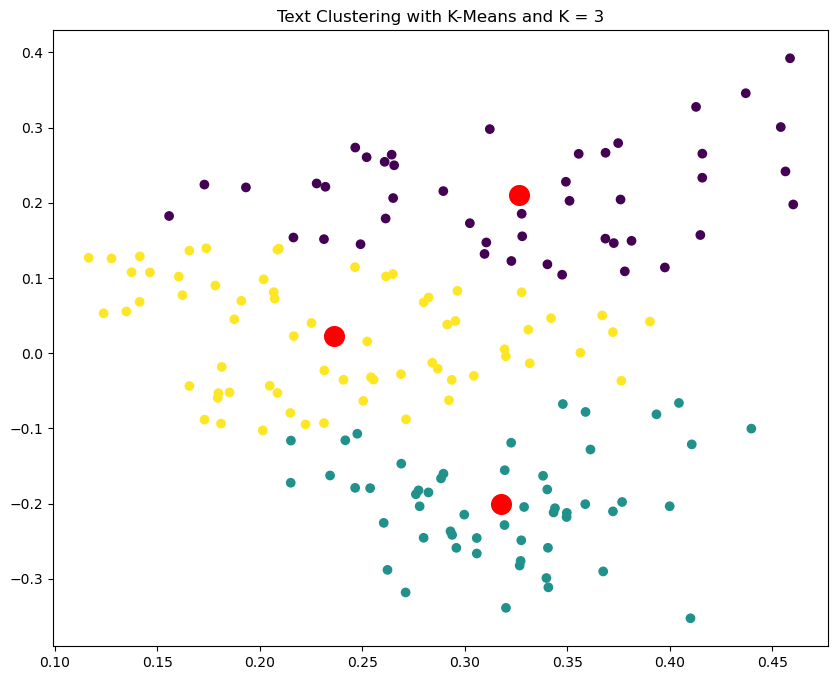

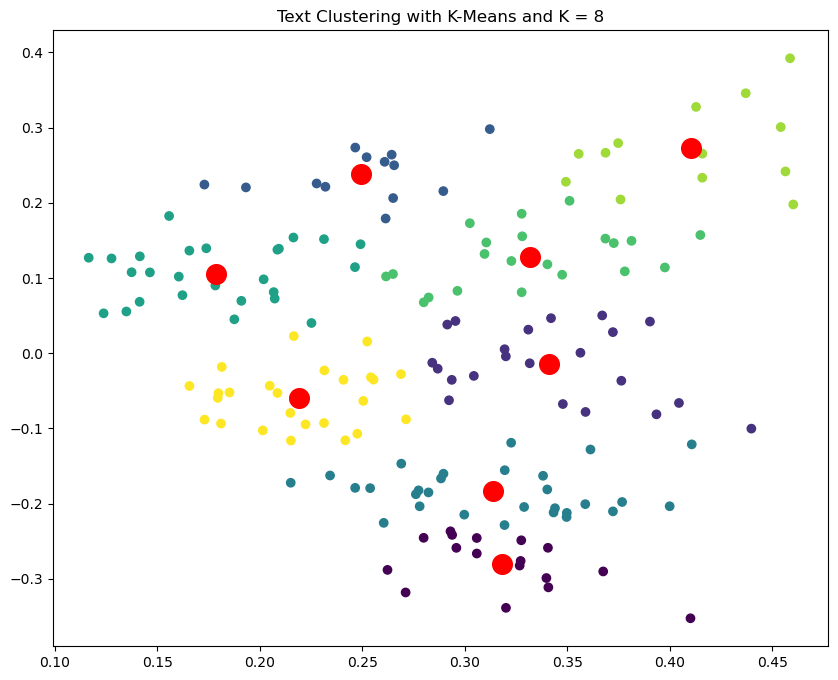

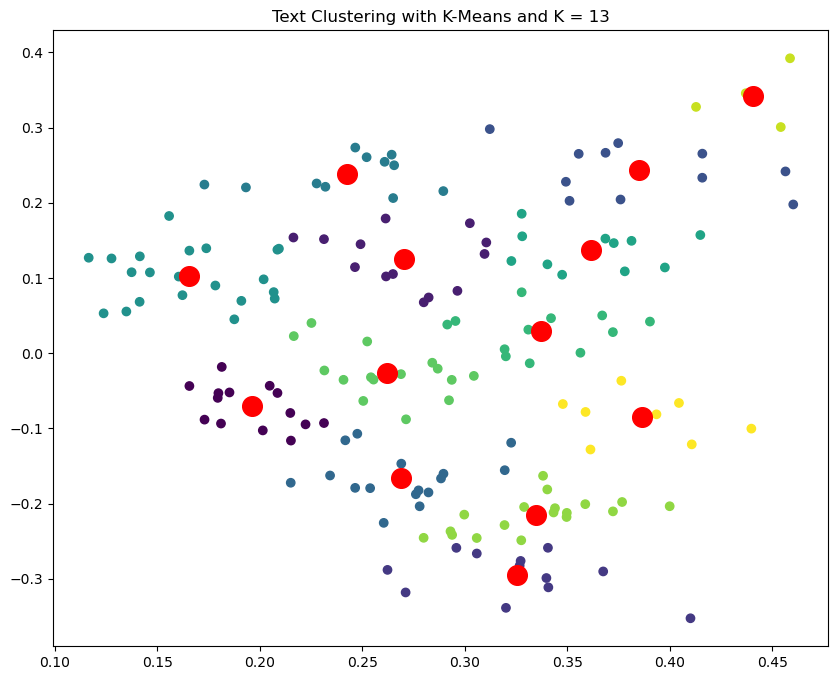

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(tf_X_vectorized)

k = [3,8,13]
for i in range(0,len(k)):
    kmeans = KMeans(n_clusters=k[i], random_state=42)
    kmeans.fit(lsa_matrix)

    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    plt.figure(figsize=(10, 8))
    plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=labels, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1,], s=200, c='red')
    plt.title("Text Clustering with K-Means and K = "+ str(k[i]))
    plt.show()

## Conclusion 


Looking at the 3 graphs, we can see that no clear clusters in these points, this maybe because our dataset has few data. To perform Clustering, a large dataset is needed.
